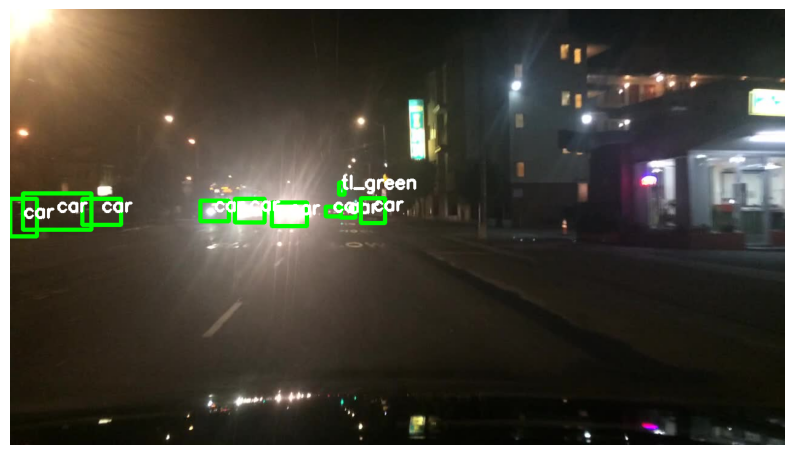

In [445]:
import cv2
import random
import glob
import os 
import matplotlib.pyplot as plt


dataset_path = "../../yolo-testing/datasets/bdd100k_night"

id2cls = {
    0: "person",
    1: "rider",
    2: "car",
    3: "bus",
    4: "truck",
    5: "bike",
    6: "motor",
    7: "tl_green",
    8: "tl_red",
    9: "tl_yellow",
    10: "tl_none",
    11: "traffic_sign",
    12: "train",
}

def draw_yolo_bboxes(image_path, label_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(label_path, 'rt') as f:
        data_lines = f.readlines()
    
    bboxes = []
    w, h = 1280, 720

    for item in range(len(data_lines)):
        cl=int(data_lines[item].split(" ")[0])
        a=float(data_lines[item].split(" ")[1])
        b=float(data_lines[item].split(" ")[2])
        c=float(data_lines[item].split(" ")[3])
        d=float(data_lines[item].split(" ")[4][:-1])
        
        x1 = int((a-c/2)*w)
        y1 = int((b-d/2)*h)
        x2 = int((a+c/2)*w)
        y2 = int((b+d/2)*h)

        bboxes.append([x1,y1,x2,y2,cl])

    for c in bboxes:
        cv2.rectangle(img, (c[0],c[1]), (c[2], c[3]), (0, 255, 0), 5)
        cv2.putText(img, str(id2cls[c[4]]), (int((c[0]+c[2])/2), int((c[1]+c[3])/2)), 0, 1, (255, 255, 255),3)
        
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

# Example usage
img_path = random.sample(glob.glob(f"{dataset_path}/images/train/*.jpg"), 1)[0]
image_name = os.path.basename(img_path)[:-4]
label_path = f"{dataset_path}/labels/train/{image_name}.txt"

draw_yolo_bboxes(img_path, label_path)